### Invers Distance Estimation (IDE)

In [1]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('001_Data_depth.txt')
xdata = data[:, 0]
ydata = data[:, 1]
poro = data[:, 2]

In [3]:
nx = 100
ny = 100

x = np.linspace(np.min(xdata), np.max(xdata), nx)
y = np.linspace(np.min(ydata), np.max(ydata), ny)

X, Y = np.meshgrid(x,y)
X = X.flatten()
Y = Y.flatten()

In [4]:
tree = spatial.KDTree(data[:, 0:2])
grid = np.vstack((X,Y)).T
dist, idx = tree.query(grid, k=len(poro))

neigh = poro[idx]
p = 2
w = 1/dist**p
est = np.sum(neigh*w, axis=1)/np.sum(w, axis=1)

<ipython-input-4-ee881e3d66d3>:7: RuntimeWarning: divide by zero encountered in true_divide
  w = 1/dist**p
<ipython-input-4-ee881e3d66d3>:8: RuntimeWarning: invalid value encountered in true_divide
  est = np.sum(neigh*w, axis=1)/np.sum(w, axis=1)


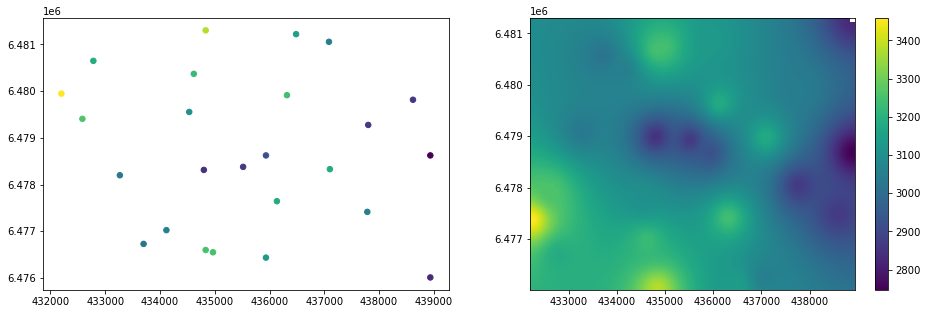

In [8]:
est = est.reshape(ny, nx)

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.scatter(xdata,ydata, s=30, c=poro)

plt.subplot(1,2,2)
plt.imshow(est, interpolation='bilinear', aspect='auto',
           extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.colorbar()
plt.show()